# __Ensemble Learning__

## __Agenda__

- Introduction to ensemble learning
    * Goals of ensemble learning
    * Importance of ensemble learning
    * Weak and Strong learners in Ensemble learning
- Categories in ensemble learning
    * Sequential ensemble technique
    * Parallel ensemble technique
- Simple techniques used in ensemble learning
    * Voting
        * Hard Voting
        * Soft Voting
    * Averaging
    * Weighted Averaging
- Advanced techniques used in ensemble learning
    * Bagging (bootstrap aggregating)
        * Bagging Techniques
        * Advantages of bagging
        * Disadvantages of bagging
        * Out-of-bag (OOB) concept
    * Boosting
        * Boosting Techniques
        * Advantages of boosting
        * Disadvantages of boosting
    * Stacking
        * Advantages of stacking
        * Disadvantages of stacking



## __1. Introduction to Ensemble Learning__

Ensemble learning combines multiple models to enhance the overall performance of machine learning algorithms. The fundamental principle of ensemble learning is combining predictions from multiple individual models to produce a more accurate and robust prediction than any single model.

### __1.1 Goals of Ensemble Learning__

- Enhance predictive accuracy by combining multiple models.
- Improve model robustness and generalization performance.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/ensemble_learning.png)

__Example:__ Imagine you are deciding whether to go outside based on weather predictions. Instead of relying on just one weather forecast, you check multiple sources, like the weather app, a meteorologist's report, and a weather website. You then combine these predictions to make your decision.

This process mirrors ensemble learning, where combining multiple models (or weather forecasts) results in a more accurate prediction (or decision) than any single model could offer.

 ### __1.2 Importance of Ensemble Learning__

- Improves prediction accuracy by combining diverse models
- Enhances model resilience and robustness against uncertainties
- Mitigates biases and errors present in individual models
- Captures a wide range of perspectives to achieve better performance
- Provides reliable and robust forecasts across various domains, ensuring more dependable outcomes

 ### __1.3 Weak and Strong learners in Ensemble Learning__
- A **Weak learner** (WL) or **Base learner** is a learning algorithm
capable of producing classifiers with probability of error strictly (but only slightly) less than that of random guessing (0.5, in the case of binary)

- On the other hand, **Strong learner** (SL) is able (given enough training data) to yield classifiers with arbitrarily small error probability. It performs much better than random guessing.
  
An ensemble (or committee) of classifiers is a classifier build upon some
combination of Weak learner. The strategy of boosting, and ensembles of classifiers, is to learn many weak classifiers and combine them, instead of trying to learn a single Strong learner

## __2. Categories in Ensemble Learning__

Ensemble learning can be broadly classified into two categories:
- Sequential ensemble technique
- Parallel ensemble technique

### __2.1 Sequential Ensemble Technique__

These techniques train models sequentially, with each model attempting to correct its predecessor's errors. This technique focuses on improving the overall performance of the ensemble by iteratively refining predictions. An example of this approach is boosting.

__Note:__ It typically employs weak learners as base estimators because these learners initially have higher error rates.

The steps involved in the sequential ensemble technique depend on the data structure and the requirements of the application. They are:
1. __Base Model Selection__: Choose the initial model.
2. __Sequential Training__: Train models one after the other.
3. __Error Correction__: Each model learns from previous mistakes.
4. __Prediction Refinement__: Iteratively refine predictions.
5. __Combining Predictions__: Combine predictions from all models.
6. __Evaluation__: Assess ensemble performance using metrics.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Sequential_Ensemble_Technique.png)

__Note:__ If all four base models are of the same type, it is considered to be a homogeneous ensemble. If they are different, it is considered heterogeneous.

The diagram above shows the training data divided into four samples, with each sample trained on a distinct base model. Insights gained from model M1 are passed to model M2 alongside sample S2. M2 then adjusts its weights and biases based on the outcomes of M1. This process repeats for models 2, 3, and 4. Finally, all the learners are combined using a weighted averaging strategy.

The summation sign ($ ∑ $) indicates the function that adjusts the model to improve its overall performance.

__The sequential ensemble technique is employed when dealing with:__
- Complex relationships between input features and the target variable
- Diverse data types, including numerical, categorical, and textual data
- Imbalanced datasets, where skewed class distributions pose classification challenges.
- Incremental updates are needed to adapt models gradually to evolving data over time

### __2.2 Parallel Ensemble Technique__

The parallel ensemble technique concurrently trains models. They combine the predictions from multiple models to improve the final output. Bagging and Random Forest algorithms are examples of parallel ensemble techniques.

__Note:__  It employs stronger learners as base estimators.

The steps involved in the parallel ensemble technique are:

1. __Data Partitioning__: Divide the dataset into subsets
2. __Model Training__: Train models concurrently on subsets
3. __Prediction__: Models make independent predictions
4. __Combining Predictions__: Aggregate predictions using techniques like voting or averaging
5. __Evaluation__: Assess ensemble performance using metrics


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Parallel_Ensemble_Technique.png)

In the above diagram, the training data is divided into four samples, labeled S1 to S4, each trained on a distinct base model (M1 to M4). Unlike the sequential ensemble technique, the data in the base learners is independent. This independence of base learners significantly reduces the error due to the application of averages.

The summation sign ($ ∑ $) indicates the aggregated model with improved performance, which has been learned from all independent base models, M1 to M4.

The parallel ensemble technique is used to:

- Enhance scalability, allowing for the efficient processing of large volumes of data by distributing the workload
-  Expedite training and prediction processes through parallel computation on multi-core systems.
- Reduce susceptibility to noise and overfitting by averaging out individual model errors.
- Capture diverse data patterns effectively by utilizing different models trained on varied data subsets

## __3. Simple Techniques used in Ensemble Learning__

* Voting
* Averaging
* Weighted Averaging




## __3.1 Voting__

Voting is one of the fundamental methods of ensemble learning. It involves aggregating the predictions from multiple models to arrive at a final prediction.
Two common types of voting in ensemble learning are:
* Majority voting/Hard voting
* Weighted voting/Soft voting.



### __3.1.1 Majority Voting/Hard Voting__

Majority Voting or Hard Voting is an ensemble learning classification technique. It involves multiple models, making predictions for each data point. Each model's prediction is considered a __vote__. The final prediction is determined by the majority vote among the models.

__Example:__
    
- Majority Voting ensemble works on breast cancer classification by combining predictions from multiple individual classifiers, such as Logistic Regression, Decision Tree, and Support Vector Machine.
- Each classifier provides its prediction for whether a given sample belongs to a certain class. The voting ensemble then aggregates these predictions using a voting mechanism.
- The final prediction is determined based on the most commonly predicted class among all classifiers.
- This approach leverages the collective wisdom of diverse models to improve overall prediction accuracy and robustness in breast cancer classification tasks.    

Let's look at an implementation of majority voting using a breast cancer classification dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset from the specified URL and assign column names to the DataFrame
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'Class']

In [3]:
data.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# Drop the 'Sample code' column as it's not required for prediction
data.drop(['Sample code'], axis=1, inplace=True)

# Replace '?' with nan to handle missing data, ensuring numerical analysis accuracy and preventing calculation errors.
data = data.replace('?', np.nan)

In [5]:
data.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [6]:
# Convert the 'Bare Nuclei' column to an integer type to ensure a uniform data type across the column,
# which is essential for consistent data manipulation and analysis.
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

In [7]:
# Replace class values to be binary (2 for benign, 4 for malignant)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

In [8]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [9]:
data['Class'].unique()

array([0, 1])

In [10]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [11]:
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [12]:
# Extract features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column as the target variable

In [13]:
X[:5]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [14]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [15]:
# Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [16]:
# Create an instance of SimpleImputer to fill in missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [17]:
# Create an instance of MinMaxScaler to scale features to a range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [18]:
X_test_scaled[:2]

array([[0.77777778, 0.33333333, 1.        , 0.44444444, 0.33333333,
        0.4       , 0.66666667, 1.        , 0.        ],
       [0.        , 0.11111111, 0.22222222, 0.        , 0.11111111,
        0.1       , 0.11111111, 0.        , 0.        ]])

In [19]:
# Initialize list for base models
estimators = [
    ('logistic', LogisticRegression(solver='liblinear')),
    ('cart', DecisionTreeClassifier(max_depth=7)),
    ('svm', SVC(probability=True, kernel='rbf')),
]

In [20]:
# Create Voting Classifier ensemble with estimators
ensemble = VotingClassifier(estimators, voting='hard')

In [21]:
# Fit the ensemble on the scaled training set and evaluate on the scaled test set
ensemble.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(solver='liblinear')),
                             ('cart', DecisionTreeClassifier(max_depth=7)),
                             ('svm', SVC(probability=True))])

In [22]:
# Predict
test_accuracy = ensemble.score(X_test_scaled, y_test)

# Print test accuracy
print(f"Test accuracy of the ensemble model: {test_accuracy:.2f}")

Test accuracy of the ensemble model: 0.96


**Observation:**

The majority voting ensemble's 96% accuracy rate demonstrates its remarkable effectiveness in predicting breast cancer classifications. By combining predictions from multiple individual classifiers, this ensemble leverages the collective insights of diverse models to achieve highly accurate results.

Let us explore other performance evaluation metrics as well:

-------Classification report--------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

-------Confusion matrix-------------


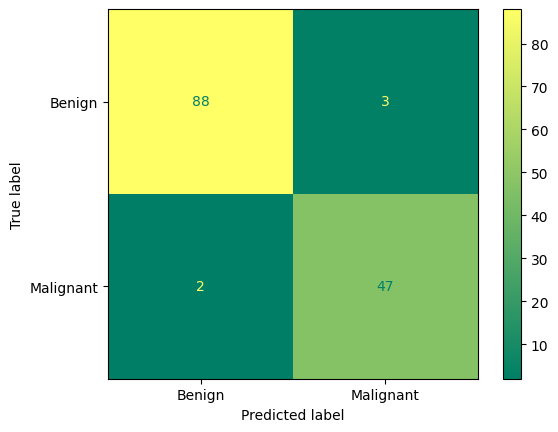

In [23]:
## Evaluating model on test dataset
y_pred = ensemble.predict(X_test_scaled)
print('-------Classification report--------')
print(classification_report(y_test,y_pred))
print('-------Confusion matrix-------------')

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign','Malignant'])
disp.plot(cmap="summer")
plt.show()

#### __Observation:__

True Positives (TP): The model correctly predicted 47 instances as "malignant" when they were indeed malignant. This indicates that there were 41 true positive predictions.

True Negatives (TN): The model correctly predicted 88 instances as "benign" when they were indeed benign. This shows 70 true negative predictions.

False Positives (FP): The model incorrectly predicted 3 instance as "malignant" when it was actually benign. This is a false positive, also known as a Type I error.

False Negatives (FN): The model incorrectly predicted 2 instances as "benign" when they were actually malignant. This is a false negative, also known as a Type II error.

**Classification Report:**

*Class 0 (Negative Class)*

Precision: 0.98

98% of the instances predicted as class 0 are actually class 0.

Recall: 0.97

97% of the actual class 0 instances are correctly predicted as class 0.

F1-Score: 0.97

The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Here, the F1-score is 0.97, indicating excellent performance.

Support: 91

There are 91 actual instances of class 0 in the test set.

*Class 1 (Positive Class)*

Precision: 0.94

94% of the instances predicted as class 1 are actually class 1.

Recall: 0.96

96% of the actual class 1 instances are correctly predicted as class 1.

F1-Score: 0.95

The F1-score for class 1 is 0.95, indicating very good performance.

Support: 49

There are 49 actual instances of class 1 in the test set.

*Overall Metrics*

Accuracy: 0.96

The overall accuracy of the model, indicating that 97% of the total instances are correctly classified.

Macro Average

Macro average calculates the metric independently for each class and then takes the average, treating all classes equally. It is useful when you have imbalanced classes.

Precision: 0.96
Recall: 0.96
F1-Score: 0.96

Weighted Average

Weighted average takes into account the support (the number of true instances for each class) to calculate the average. It is more representative of the performance on imbalanced datasets.

Precision: 0.96
Recall: 0.96
F1-Score: 0.96

In [24]:
# Set up KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

# Evaluate ensemble model using cross-validation
results = cross_val_score(ensemble, X_train_scaled, y_train, cv=kfold)

# Print mean accuracy score of the ensemble model
print(f"Mean cross-validation accuracy of the ensemble model: {results.mean():.2f}")

Mean cross-validation accuracy of the ensemble model: 0.96


### __3.1.2 Soft Voting__

Soft voting takes into account the probability estimates for each class provided by the models, assuming the models are capable of estimating these probabilities (i.e., they have a predict_proba method). The final prediction is determined by averaging these probabilities across all models, and the class

In [25]:
# Initialize list for base models
estimators = [
    ('logistic', LogisticRegression(solver='liblinear')),
    ('cart', DecisionTreeClassifier(max_depth=7)),
    ('svm', SVC(probability=True, kernel='rbf')),
    ('nb', GaussianNB())
]

# Create Voting Classifier ensemble with estimators
soft_ensemble = VotingClassifier(
    estimators=estimators,
    voting='soft'
)

In [26]:
# Fit the ensemble on the scaled training set and evaluate on the scaled test set
soft_ensemble.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(solver='liblinear')),
                             ('cart', DecisionTreeClassifier(max_depth=7)),
                             ('svm', SVC(probability=True)),
                             ('nb', GaussianNB())],
                 voting='soft')

In [27]:
# Predict
test_accuracy = soft_ensemble.score(X_test_scaled, y_test)

# Print test accuracy
print(f"Test accuracy of the ensemble model: {test_accuracy:.2f}")

Test accuracy of the ensemble model: 0.96


-------Classification report--------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

-------Confusion matrix-------------


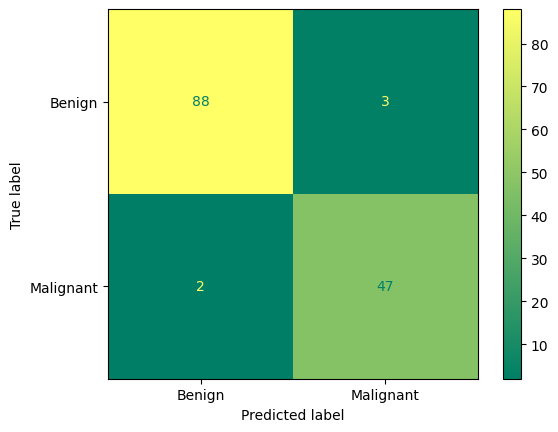

In [28]:
## evaluating model on test dataset
y_pred = soft_ensemble.predict(X_test_scaled)
print('-------Classification report--------')
print(classification_report(y_test,y_pred))
print('-------Confusion matrix-------------')

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign','Malignant'])
disp.plot(cmap="summer")
plt.show()

### __3.1.3 Weighted Voting/Soft Voting__

Soft voting takes into account the probability estimates for each class provided by the models, assuming the models are capable of estimating these probabilities (i.e., they have a predict_proba method). The final prediction is determined by averaging these probabilities across all models, and the class with the highest average probability is selected.

### **Implementation of Hard and Soft Voting for comparison**



- `make_pipeline`: Construct a Pipeline from the given estimators.


In [29]:
# Imputation to handle missing values
imputer = SimpleImputer(strategy='median')

# Define the base models with standard scaling and imputation
model1 = make_pipeline(imputer, StandardScaler(), LogisticRegression(random_state=1, max_iter=10000))
model2 = make_pipeline(imputer, StandardScaler(), DecisionTreeClassifier(random_state=1))
model3 = make_pipeline(imputer, StandardScaler(), SVC(probability=True, random_state=1))

# Define k-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [30]:
# Create an ensemble of models for hard voting
hard_voting_classifier = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('svc', model3)],
    voting='hard'
)

# Fit and evaluate on the test data
hard_voting_classifier.fit(X_train, y_train)

y_pred_hard = hard_voting_classifier.predict(X_test)
hard_test_accuracy = hard_voting_classifier.score(X_test, y_test)
print(f"Hard Voting - Test Accuracy: {hard_test_accuracy:.4f}")

Hard Voting - Test Accuracy: 0.9643


In [31]:
# Cross-validation on the training data
hard_cv_scores = cross_val_score(hard_voting_classifier, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Hard Voting - Mean CV Accuracy: {hard_cv_scores.mean():.4f}")

Hard Voting - Mean CV Accuracy: 0.9659


In [32]:
# Additional evaluation metrics for hard voting classifier
print("Hard Voting - Classification Report")
print(classification_report(y_test, y_pred_hard))
print("Hard Voting - Confusion Matrix:-")
print(confusion_matrix(y_test, y_pred_hard))
print("----------------------------------------------")

Hard Voting - Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Hard Voting - Confusion Matrix:-
[[88  3]
 [ 2 47]]
----------------------------------------------


In [33]:
# Create and evaluate a soft voting classifier
soft_voting_classifier = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('svc', model3)],
    voting='soft'
)

# Fit and evaluate on the test data
soft_voting_classifier.fit(X_train, y_train)

y_pred_soft = soft_voting_classifier.predict(X_test)
soft_test_accuracy = soft_voting_classifier.score(X_test, y_test)
print(f"Soft Voting - Test Accuracy: {soft_test_accuracy:.4f}")

Soft Voting - Test Accuracy: 0.9643


In [34]:
# Cross-validation on the training data
soft_cv_scores = cross_val_score(soft_voting_classifier, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Soft Voting - Mean CV Accuracy: {soft_cv_scores.mean():.4f}")

Soft Voting - Mean CV Accuracy: 0.9624


In [35]:
# Additional evaluation metrics for soft voting classifier
print("Soft Voting - Classification Report:-")
print(classification_report(y_test, y_pred_soft))
print("Soft Voting - Confusion Matrix")
print(confusion_matrix(y_test, y_pred_soft))

Soft Voting - Classification Report:-
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Soft Voting - Confusion Matrix
[[88  3]
 [ 2 47]]


### __3.2 Averaging__

The averaging technique is used mainly for regression problems. In this method, the predictions of multiple models are averaged to obtain the final prediction. This technique helps reduce variance and produces a more stable prediction.

__Example:__

- Averaging ensemble works by combining the predictions from multiple classifiers trained on the dataset.
- These classifiers, such as Logistic Regression, Decision Tree, and Support Vector Machine, provide individual predictions for each data point.
- Then it takes the average of these predictions to form a final prediction.
- This approach helps to mitigate biases and uncertainties inherent in individual models, leading to a more accurate prediction of breast cancer classifications.

**Note:** X and y from the previous dataset is  used for the implementation

In [36]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Create an instance of SimpleImputer to fill in missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create an instance of MinMaxScaler to scale features to a range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [38]:
# Initialize classifiers
LogReg_clf = LogisticRegression()
Dtree_clf = DecisionTreeClassifier()
svc_clf = SVC(probability=True)

In [39]:
# Train classifiers on the training dataset
# FIT LOGISTIC REGRESSION
# FIT DECISION TREE
# FIT SUPPORT VECTOR MACHINE
LogReg_clf.fit(X_train_scaled, y_train)
Dtree_clf.fit(X_train_scaled, y_train)
svc_clf.fit(X_train_scaled, y_train)

SVC(probability=True)

In [40]:
# Generate probability predictions for the positive class from each classifier on the test set
LogReg_prob = LogReg_clf.predict_proba(X_test_scaled)[:, 1]
Dtree_prob = Dtree_clf.predict_proba(X_test_scaled)[:, 1]
svc_prob = svc_clf.predict_proba(X_test_scaled)[:, 1]

In [41]:
LogReg_prob[:10]

array([0.00778877, 0.02235634, 0.02042097, 0.85681797, 0.01511342,
       0.01136255, 0.06237378, 0.98433025, 0.96999564, 0.20198665])

In [42]:
Dtree_prob[:10]

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 0.])

In [43]:
svc_prob[:10]

array([0.0030347 , 0.00391711, 0.00357036, 0.92033455, 0.00304162,
       0.0036136 , 0.01970762, 0.95257058, 0.95792961, 0.13463838])

In [44]:
# Average the probability predictions
avg_probs = (LogReg_prob + Dtree_prob + svc_prob) / 3

In [45]:
avg_probs[:10]

array([0.00360783, 0.00875782, 0.00799711, 0.92571751, 0.00605168,
       0.00499205, 0.02736047, 0.97896694, 0.97597508, 0.11220834])

In [46]:
# Convert averaged probabilities to class predictions based on a threshold of 0.5
avg_preds = avg_probs > 0.5

# Print a few results
print(np.array(y_test)[:20],"Exact")
print(avg_preds[:20],"Predicted")

[0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1] Exact
[False False False  True False False False  True  True False False  True
 False False False  True False  True  True  True] Predicted


In [47]:
# Evaluate the accuracy of the averaged predictions on the test set
accuracy = accuracy_score(y_test, avg_preds)

# Print the accuracy
print("Accuracy of averaged model predictions on test data:", accuracy)

Accuracy of averaged model predictions on test data: 0.9571428571428572


The averaging ensemble achieves an accuracy of 95%, slightly lower than the max voting ensemble. However, this accuracy rate still underscores the effectiveness of the averaging ensemble in breast cancer classification.

### __3.3 Weighted Averaging__

Weighted averaging assigns different weights to each model’s prediction, reflecting its importance or reliability. The final prediction is a weighted average, which can be more effective than simple averaging because it considers each model's performance.

__Example:__

- In medical diagnosis, weighted ensemble learning combines results from various diagnostic tests with different reliabilities.
- Each test's result is weighted based on its importance. For instance, blood tests, imaging scans, and physical examinations' results are combined to determine a patient's diagnosis accurately and reliably.

By weighting and averaging results from multiple diagnostic tests, you can determine the final diagnosis, thereby enhancing diagnostic accuracy and reliability. This highlights the significance of weighted averaging for improving decision-making.

## __4. Advanced Techniques for Ensemble Learning__

These techniques use complex methods to merge predictions from many individual models. It aims for better predictive accuracy. They are employed for complex problems where high predictive accuracy is crucial, such as in financial forecasting, medical diagnosis, and natural language processing applications.

### __4.1 Bagging__

Bagging or Bootstrap Aggregating enhances the stability and accuracy of machine learning algorithms. This method creates multiple subsets from the original dataset, known as bootstrap samples, by selecting data points with replacement. Each subset trains a separate model.

For final predictions, Bagging combines the individual models' outputs by using voting (for classification tasks) or averaging (for regression tasks). This approach effectively reduces variance and helps prevent overfitting.

__Note:__ Tree bagging is a popular algorithm that utilizes bagging by training multiple decision trees on different bootstrap samples and combining their predictions.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Ensembled_Learning_Bagging.png)

__Note:__ The numbering shown in the above image outlines the specific workflow for bagging.

In [48]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [49]:
# Load the Pima Indians Diabetes dataset using the given URL and assign the names

url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

# Check the head of the data using the head() method
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
data['class'].unique()

array([1, 0])

Create a feature matrix X and a target vector y


In [51]:
# Assign all the rows up to the 8th column of the data to X
X = data.iloc[:,0:8].values

# Assign the 9th column of the same data to Y
y = data["class"].values

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Create an instance of SimpleImputer to fill in missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create an instance of MinMaxScaler to scale features to a range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [54]:
# Create a decision tree classifier named cart
cart = DecisionTreeClassifier()

# The estimator will be set to 100, which is equal to the number of trees
num_trees = 100

#### __Apply the bagging technique__

* `oob_score`: This is a method of measuring the prediction error of random forests, bagging, and other ensemble methods that involve bootstrap aggregating

We'll talk about it in detail below

In [55]:
# Create a bagging classifier with the decision tree classifier (cart) as the base estimator
# Ensure oob_score is enabled
bagging_model = BaggingClassifier(
    estimator=cart,
    n_estimators=num_trees,
    oob_score=True,
    max_samples=0.66,
    random_state=42
)

In [56]:
# fitting  and evaluating Bagging classifier model in training and test dataset
bagging_model.fit(X_train, y_train)
# evaluating model on test dataset
y_pred = bagging_model.predict(X_test_scaled)

# Print a few results
print(np.array(y_test)[:20],"Exact")
print(y_pred[:20],"Predicted")

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1] Exact
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] Predicted


___________________________Bagging Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154

# Confusion matrix


/Users/xyz-ai/Developer/python3-code/ml/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/xyz-ai/Developer/python3-code/ml/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/xyz-ai/Developer/python3-code/ml/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

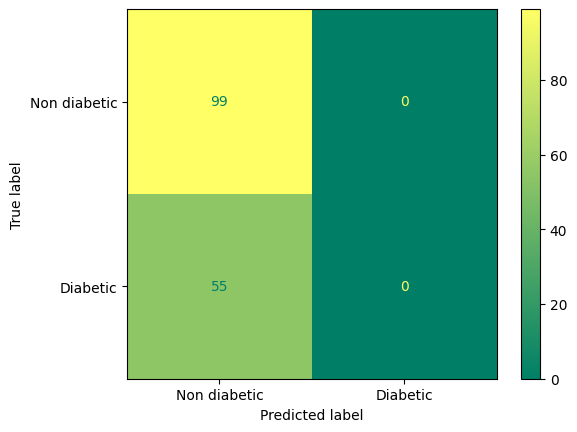

In [57]:
print('___________________________Bagging Classifier_______________________')
print()
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Non diabetic','Diabetic']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

In [58]:
# Set up the k-fold cross-validation with n_splits to 10
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

# Perform cross-validation using the model, feature matrix (X), target vector (y), and specified number of folds (cv)
results = model_selection.cross_val_score(bagging_model, X_train_scaled, y_train, cv=kfold)

# Print the cross-validation results
print(results)
print('Mean=',results.mean())

[0.77419355 0.77419355 0.75806452 0.75806452 0.83606557 0.80327869
 0.63934426 0.83606557 0.73770492 0.7704918 ]
Mean= 0.7687466948704389


__Observations:__
- The results array contains the cross-validation scores for each fold of the data.
- The cross-validation scores indicate the performance of the BaggingClassifier model on different subsets of the data.
- These scores can assess the generalization ability and performance stability of the BaggingClassifier model across multiple iterations of the training data.

In [59]:
# Calculate the Mean Cross-Validation Score using .mean() function
mean_score = np.mean(results)

print("Mean Cross-Validation Score:", mean_score)

Mean Cross-Validation Score: 0.7687466948704389


- The provided code illustrates a bagging implementation with a DecisionTreeClassifier base estimator. It employs KFold cross-validation with 10 folds and applies BaggingClassifier with 100 decision tree estimators to each fold.
- The resultant mean cross-validation score of 0.75 demonstrates the ensemble's effectiveness in enhancing predictive performance compared to a single decision tree classifier.

### __4.1.1 Advantages of Bagging__

- It reduces the risk of overfitting by training on various subsets of the data.
- It improves the model's accuracy and stability.
- It works well with complex models that tend to overfit.

### __4.1.2 Disadvantages of Bagging__

- It increases computational complexity because it requires training multiple models.
- It may not significantly improve performance if the base models are already biased.

### __4.1.3  Out-Of-Bag (OOB) Concept__

In bagging, __out-of-bag (OOB)__ data refers to instances not included in the bootstrap sample for training a specific base model. Since the process trains each model on a random subset of the original data, it naturally leaves out some instances.

These OOB instances serve as a built-in validation set for each model, allowing for an assessment of the model's performance on unseen data points. You can compute the OOB error, which offers an efficient way to evaluate the model's generalization ability.

This method may reduce the need for additional validation data or cross-validation procedures.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Out_Of_Bag_Concept.png)

In the above image, Sample 1 lacks Rat and Cow, whereas Sample 3 includes all animals from the primary training set. Data points were randomly chosen with replacement during sample creation, and those omitted from a particular sample are identified as out-of-bag (OOB) points.

 - The OOB score is an estimate of performance that mimics cross-validation. It uses out-of-bag samples to estimate the model's accuracy.

 - This means that for each tree in a bagging ensemble, only the data not seen by the tree (out-of-bag data) are used to assess that tree’s performance.

In [60]:
# Compute OOB error
oob_error = 1 - bagging_model.oob_score_

print("Out-of-Bag Error:", oob_error)
print("Out of Bag Score:", bagging_model.oob_score_, " also called as OOB Accuracy")
print("Bagging error + accuracy:", bagging_model.oob_score_ +
      oob_error, " also called as OOB Accuracy")

Out-of-Bag Error: 0.23289902280130292
Out of Bag Score: 0.7671009771986971  also called as OOB Accuracy
Bagging error + accuracy: 1.0  also called as OOB Accuracy


__Observations:__
- The code computes the out-of-bag (OOB) error for a BaggingClassifier model using cross-validation.
- It calculates the OOB error by subtracting the OOB score from 1.
- The **OOB score** represents the model's accuracy on out-of-bag samples.
- The OOB error provides insight into the model's performance on unseen data points, indicating the misclassification rate of the model.

### __4.2 Boosting__

Boosting is a sequential ensemble technique where each model corrects its predecessor's mistakes. The main idea is to train models sequentially, each trying to correct the errors of the previous model.

The final prediction is a weighted sum of all the models' predictions. Boosting significantly reduces bias and variance, leading to more accurate models.

__Note:__ Popular boosting algorithms include AdaBoost, Gradient Boosting Machines (GBM), and XGBoost.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Ensembled_Learning_Boosting.png)

__Note:__ The numbering shown in the above image specifically outlines the workflow for boosting.

#### __4.2.1 Boosting Techniques__

There are various meta-algorithms in boosting that differentiate how the base models are aggregated, such as:
* Adaboost
* Gradient Boost
* XGBoost
* CatBoost

**Meta-algorithm** (or meta-learning) involves learning algorithms that are designed to learn how to combine the predictions of multiple machine learning models, often referred to as base models or learners, to improve overall performance

#### __4.2.2. AdaBoost Algorithm__

AdaBoost, an abbreviation for adaptive boosting, stands as one of the leading boosting algorithms with widespread adoption. It focuses on classification problems, aiming to transform a collection of weak classifiers into a single strong classifier. It increases the weights of misclassified instances, directing subsequent classifiers to pay more attention to challenging cases.

**The AdaBoost algorithm follows these steps:**
1. Initially, the algorithm assigns equal weights to all observations in the dataset.
2. A model is constructed using a subset of the data.
3. Predictions are made on the entire dataset using this model.
4. The algorithm computes errors by comparing these predictions to the actual values.
5. In the subsequent model creation, the algorithm assigns higher weights to incorrectly predicted data points.
6. Weights are determined based on error values, where higher errors result in heavier observation weights.
7. This iterative process continues until the error function stabilizes or the algorithm reaches the maximum limit of estimators.



### **Implementation of Adaboost Classifier and Bagging classifier to compare the performance:**

In [61]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the dataset from the given URL and assign column names
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

In [62]:
data.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [63]:
# Drop the 'Sample code' column as it's not required for prediction
data.drop(['Sample code'], axis=1, inplace=True)

# Replace '?' with nan to handle missing data, ensuring numerical analysis accuracy and preventing calculation errors.
data = data.replace('?', np.nan)

In [64]:
# Replace class values to be binary (2 for benign, 4 for malignant)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

In [65]:
# Convert the 'Bare Nuclei' column to an integer type to ensure a uniform data type across the column,
# which is essential for consistent data manipulation and analysis.
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

- A SimpleImputer handles missing values in a dataset by imputing (i.e., filling in) the missing values with a specified statistic, such as the mean, median, or most frequent value of the respective feature.
- This is important because missing values can disrupt the analysis and modeling process, leading to biased results or errors in predictive models.
- Imputation helps maintain the integrity and completeness of the dataset, ensuring that the analysis or modeling algorithms can effectively utilize the available data for accurate insights or predictions.

In [66]:
# Split data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [68]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [69]:
# Define K-fold cross-validation
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Create a pipeline for AdaBoost classifier with Decision Tree base estimator
adaboost_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', AdaBoostClassifier(n_estimators=70, random_state=7))
])

In [70]:
# Fit the Adaboost Classifier pipeline on the training set and evaluate on the test set
adaboost_pipeline.fit(X_train, y_train)

# Print a few results
print(np.array(y_test)[:20],"Exact")
print(adaboost_pipeline.predict(X_test)[:20],"Predicted")

[1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0] Exact
[1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0] Predicted


In [71]:
adaboost_test_score = adaboost_pipeline.score(X_test, y_test)
print("Adaboost Classifier test accuracy: ", adaboost_test_score)

Adaboost Classifier test accuracy:  0.9571428571428572


In [72]:
# Evaluate the Adaboost Classifier pipeline using cross-validation on the training set
adaboost_results = cross_val_score(adaboost_pipeline, X_train, y_train, cv=kfold)
print("AdaBoost Classifier mean accuracy: ", adaboost_results.mean())

AdaBoost Classifier mean accuracy:  0.9534740259740259


In [73]:
# Get AdaBoost Classifier model
adaboost_model = adaboost_pipeline.named_steps['classifier']
# Get the base estimator
base_estimator = adaboost_model.estimators_
print(f"Feature used: {data.columns[base_estimator[0].tree_.feature].tolist()}")
for i, stump in enumerate(base_estimator):
    print(f"Stump {i+1}:", end = " ")
    print(f"Feature: {data.columns[stump.tree_.feature].tolist()}", end = " ")
    print(f"Threshold: {stump.tree_.threshold}")

Feature used: ['Uniformity of Cell Size', 'Mitoses', 'Mitoses']
Stump 1: Feature: ['Uniformity of Cell Size', 'Mitoses', 'Mitoses'] Threshold: [ 0.16666667 -2.         -2.        ]
Stump 2: Feature: ['Bare Nuclei', 'Mitoses', 'Mitoses'] Threshold: [ 0.35000001 -2.         -2.        ]
Stump 3: Feature: ['Clump Thickness', 'Mitoses', 'Mitoses'] Threshold: [ 0.61111113 -2.         -2.        ]
Stump 4: Feature: ['Normal Nucleoli', 'Mitoses', 'Mitoses'] Threshold: [ 0.83333334 -2.         -2.        ]
Stump 5: Feature: ['Marginal Adhesion', 'Mitoses', 'Mitoses'] Threshold: [ 0.50000001 -2.         -2.        ]
Stump 6: Feature: ['Uniformity of Cell Shape', 'Mitoses', 'Mitoses'] Threshold: [ 0.05555556 -2.         -2.        ]
Stump 7: Feature: ['Mitoses', 'Mitoses', 'Mitoses'] Threshold: [ 0.16666667 -2.         -2.        ]
Stump 8: Feature: ['Bare Nuclei', 'Mitoses', 'Mitoses'] Threshold: [ 0.75 -2.   -2.  ]
Stump 9: Feature: ['Uniformity of Cell Size', 'Mitoses', 'Mitoses'] Threshold: 

___________________________Adaboost Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        91
           1       0.96      0.92      0.94        49

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

# Confusion matrix


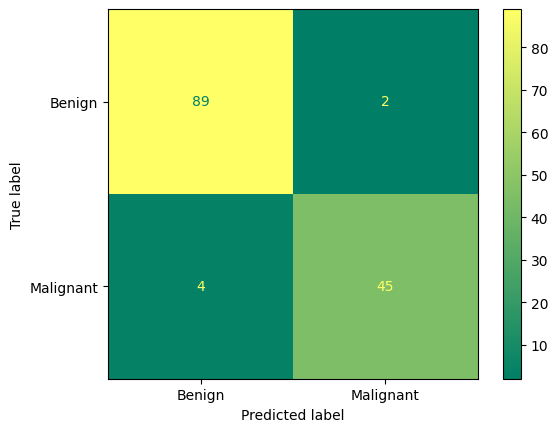

In [74]:
# Classification report, confusion matrix

print('___________________________Adaboost Classifier_______________________')
print()
# evaluating model on test dataset
y_pred = adaboost_pipeline.predict(X_test)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

__Observations:__

- This demonstrates the importance and effectiveness of AdaBoost in enhancing the predictive capability of weak learners, like decision trees.

#### __4.2.3. Gradient Boosting Machine__






Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Gradient boosting is also known as gradient tree boosting, stochastic gradient boosting (an extension), and gradient boosting machines, or GBM for short.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models

**Gradient Boosting involves three main components:**

* Loss Function: The choice of loss function depends on the type of problem being solved (e.g., regression, classification). The goal is to find a model that minimizes the loss function.

* Weak Learners: Gradient Boosting uses decision trees as the default weak learner. These trees are usually of a fixed size and depth and are created one at a time.

* Additive Model: Instead of adjusting the weights of data points like AdaBoost, Gradient Boosting fits new models to the residual errors made by previous models. Essentially, each new model is built on the errors of the whole ensemble so far.

#### __4.2.4. XGBoost__

XGBoost, or eXtreme Gradient Boosting, stands out as a premier machine learning framework, widely adopted for its proficiency in supervised learning tasks including classification, regression, and ranking. This advanced algorithm builds upon the principles of gradient boosting and is celebrated for its exceptional accuracy and scalability in handling complex predictive modeling challenges.

 **XGBoost offers many essential features that make it ideal for classification tasks. Some of the reasons include:**

* High performance: As mentioned above, XGBoost is optimized for speed and efficiency, making it appropriate for large datasets and real-time applications.

* Regularization methods: L1 (Lasso) and L2 (Ridge) regularisation terms are included in XGBoost to avoid overfitting and increase generalization.

* Handle missing data: Moreover, XGBoost can handle missing data automatically, minimizing the need for preprocessing and imputation.




#### __4.2.5. CatBoost__

Catboost is a variant of gradient boosting that can handle both categorical and numerical features. It does not require any feature encodings techniques like One-Hot Encoder or Label Encoder to convert categorical features into numerical features.

### **Implementation of XGBoost, Gradient Boost and CatBoost Algorithm:**

In [75]:
!pip install catboost


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [76]:
# Import necessary libraries
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Load the dataset from the given URL and assign column names
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
data.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [77]:
# Drop the 'Sample code' column as it's not required for prediction
data.drop(['Sample code'], axis=1, inplace=True)

# Replace '?' with nan to handle missing data, ensuring numerical analysis accuracy and preventing calculation errors.
data = data.replace('?', np.nan)

In [78]:
# Replace class values to be binary (2 for benign, 4 for malignant)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

In [79]:
# Convert the 'Bare Nuclei' column to an integer type to ensure a uniform data type across the column,
# which is essential for consistent data manipulation and analysis.
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

In [80]:
# Split data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Define K-fold cross-validation
kfold = KFold(n_splits=10, random_state=7, shuffle=True)


In [81]:
# Gradient Boosting Classifier
gb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=7))
])

In [82]:
# Fit the Gradient boosting Classifier pipeline on the training set and evaluate on the test set
gb_pipeline.fit(X_train, y_train)

# Print a few results
print(np.array(y_test)[:20],"Exact")
print(gb_pipeline.predict(X_test)[:20],"Predicted")

[1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0] Exact
[1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0] Predicted


In [83]:
gb_boost_test_score = gb_pipeline.score(X_test, y_test)
print("Gradient Boosting Classifier test accuracy: ", gb_boost_test_score)

Gradient Boosting Classifier test accuracy:  0.9571428571428572


In [84]:
# Evaluate the Gradient Boosting Classifier pipeline using cross-validation on the training set
gb_results = cross_val_score(gb_pipeline, X_train, y_train, cv=kfold)
print("Gradient Boosting Classifier mean accuracy after cross validation: ", gb_results.mean())

Gradient Boosting Classifier mean accuracy after cross validation:  0.9588961038961038


___________________________Gradient Boosting Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        91
           1       0.94      0.94      0.94        49

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

# Confusion matrix


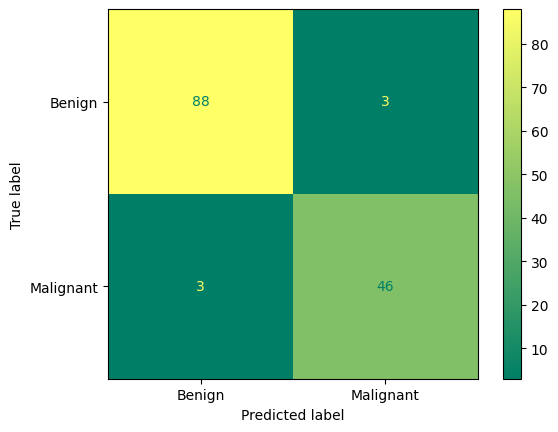

In [85]:
# Classification report, confusion matrix

print('___________________________Gradient Boosting Classifier_______________________')
print()
# evaluating model on test dataset
y_pred = gb_pipeline.predict(X_test)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

- In XGBoost, one-hot encoding is used for multi-class classification problems to transform the categorical target variables into a binary matrix format.

- This conversion is crucial for applying gradient boosting techniques effectively, allowing each model iteration to focus on optimizing classification accuracy across potentially many different classes.

- XGBoost, along with other gradient boosting methods, enhances model accuracy by optimizing specific loss functions. Logarithmic Loss (**LogLoss**), also known as Cross-Entropy Loss is  used as an evaluation metric for this classification problems.


In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [87]:
# XGBoost Classifier
xgb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', XGBClassifier(n_estimators=100, random_state=7))
])

In [88]:
# Fit the Gradient boosting Classifier pipeline on the training set and evaluate on the test set
xgb_pipeline.fit(X_train, y_train)

# Print a few results
print(np.array(y_test)[:20],"Exact")
print(xgb_pipeline.predict(X_test)[:20],"Predicted")

[1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0] Exact
[1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0] Predicted


In [89]:
xgb_test_score = xgb_pipeline.score(X_test, y_test)
print("XGBoost Classifier test accuracy: ", xgb_test_score)
print()

XGBoost Classifier test accuracy:  0.9428571428571428



In [90]:
# Evaluate the XGBoost Classifier pipeline using cross-validation on the training set
xgb_results = cross_val_score(xgb_pipeline, X_train, y_train, cv=kfold, error_score="raise")
print("XGBoost Classifier mean accuracy: ", xgb_results.mean())

XGBoost Classifier mean accuracy:  0.957012987012987


___________________________XGBoost Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        91
           1       0.94      0.90      0.92        49

    accuracy                           0.94       140
   macro avg       0.94      0.93      0.94       140
weighted avg       0.94      0.94      0.94       140

# Confusion matrix


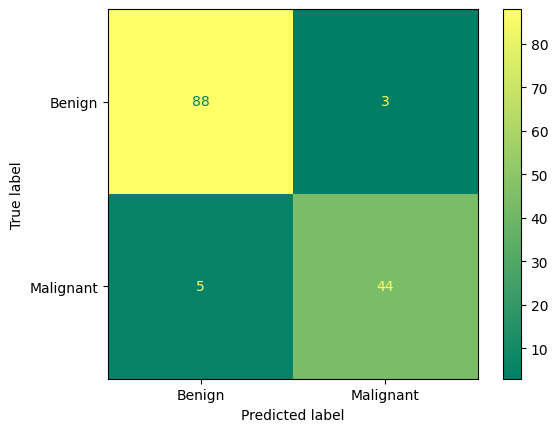

In [91]:
# Classification report, confusion matrix

print('___________________________XGBoost Classifier_______________________')
print()
# evaluating model on test dataset
y_pred = xgb_pipeline.predict(X_test)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

In [92]:
# CatBoost Classifier
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', CatBoostClassifier(n_estimators=100, random_state=7))
])

In [93]:
# Fit the CatBoost Classifier pipeline on the training set and evaluate on the test set
cat_pipeline.fit(X_train, y_train)

# Print a few results
print(np.array(y_test)[:20],"Exact")
print(cat_pipeline.predict(X_test)[:20],"Predicted")

Learning rate set to 0.066386
0:	learn: 0.6498153	total: 55.8ms	remaining: 5.53s
1:	learn: 0.6082749	total: 56ms	remaining: 2.74s
2:	learn: 0.5701400	total: 56.2ms	remaining: 1.81s
3:	learn: 0.5352927	total: 56.3ms	remaining: 1.35s
4:	learn: 0.5059370	total: 56.5ms	remaining: 1.07s
5:	learn: 0.4781711	total: 56.6ms	remaining: 887ms
6:	learn: 0.4515309	total: 56.8ms	remaining: 755ms
7:	learn: 0.4269864	total: 57ms	remaining: 655ms
8:	learn: 0.4042665	total: 57.1ms	remaining: 578ms
9:	learn: 0.3849729	total: 57.3ms	remaining: 516ms
10:	learn: 0.3654936	total: 57.5ms	remaining: 465ms
11:	learn: 0.3478777	total: 57.6ms	remaining: 423ms
12:	learn: 0.3315815	total: 57.8ms	remaining: 387ms
13:	learn: 0.3162866	total: 58ms	remaining: 356ms
14:	learn: 0.3019002	total: 58.1ms	remaining: 329ms
15:	learn: 0.2887591	total: 58.3ms	remaining: 306ms
16:	learn: 0.2769501	total: 58.4ms	remaining: 285ms
17:	learn: 0.2658184	total: 58.6ms	remaining: 267ms
18:	learn: 0.2558447	total: 58.8ms	remaining: 251m

In [94]:
cat_test_score = cat_pipeline.score(X_test, y_test)
print("CatBoost Classifier test accuracy: ", cat_test_score)

CatBoost Classifier test accuracy:  0.9571428571428572


In [95]:
# Evaluate the CatBoost Classifier pipeline using cross-validation on the training set
cat_cv_results = cross_val_score(cat_pipeline, X_train, y_train, cv=kfold)
print("CatBoost Classifier CV mean accuracy: ", cat_cv_results.mean())

Learning rate set to 0.063461
0:	learn: 0.6507199	total: 238us	remaining: 23.6ms
1:	learn: 0.6115894	total: 386us	remaining: 18.9ms
2:	learn: 0.5753692	total: 523us	remaining: 16.9ms
3:	learn: 0.5420673	total: 662us	remaining: 15.9ms
4:	learn: 0.5140598	total: 794us	remaining: 15.1ms
5:	learn: 0.4879655	total: 939us	remaining: 14.7ms
6:	learn: 0.4626604	total: 1.07ms	remaining: 14.2ms
7:	learn: 0.4390682	total: 1.23ms	remaining: 14.2ms
8:	learn: 0.4176429	total: 1.37ms	remaining: 13.9ms
9:	learn: 0.3986945	total: 1.52ms	remaining: 13.7ms
10:	learn: 0.3792685	total: 1.64ms	remaining: 13.3ms
11:	learn: 0.3618851	total: 1.76ms	remaining: 12.9ms
12:	learn: 0.3456041	total: 1.91ms	remaining: 12.8ms
13:	learn: 0.3282179	total: 2.04ms	remaining: 12.5ms
14:	learn: 0.3138785	total: 2.19ms	remaining: 12.4ms
15:	learn: 0.3005735	total: 2.33ms	remaining: 12.2ms
16:	learn: 0.2890496	total: 2.47ms	remaining: 12.1ms
17:	learn: 0.2769646	total: 2.63ms	remaining: 12ms
18:	learn: 0.2659762	total: 2.78ms

___________________________CatBoost Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        91
           1       0.94      0.94      0.94        49

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

# Confusion matrix


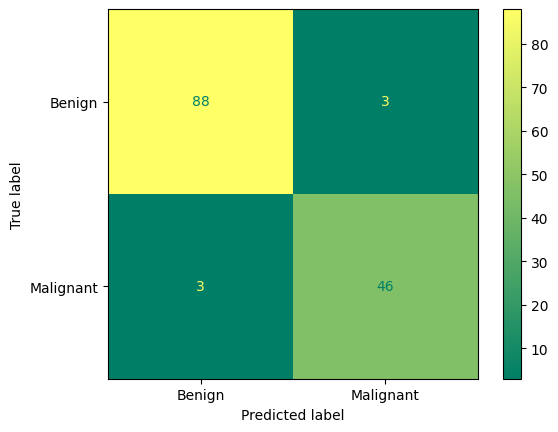

In [96]:
# Classification report, confusion matrix

print('___________________________CatBoost Classifier_______________________')
print()
# evaluating model on test dataset
y_pred = cat_pipeline.predict(X_test)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

### __4.2.6 Advantages of Boosting__

- It enhances accuracy by reducing both bias and variance significantly.
- It is adaptable and compatible with various types of models.
- It is efficient in complex scenarios where simple models struggle.


### __4.2.7 Disadvantages of Boosting__

- It is more susceptible to overfitting compared to bagging when dealing with noisy data.
- It demands more computational resources as models are trained sequentially.
- It requires careful parameter tuning to prevent overfitting.

### __4.3 Stacking__

Stacking combines multiple classification or regression models via a meta model which could be a meta-classifier or a meta-regressor. After training the base models on the complete dataset, the meta-model trains on the base models' outputs as features, to give final prediction.

This technique leverages the strengths of each base model and can achieve higher accuracy.

* In stacking, as opposed to bagging, a variety of models (not solely decision trees) are employed, all of which are trained on the same full dataset rather than on subsets.
* Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/image7.png)

__Note:__ The numbering shown in the above image specifically outlines the workflow for stacking.

- Stacking aims to leverage the advantages of different base models by inputting their predictions into a meta-model.

The structure of a stacking model consists of multiple base models, also known as level-0 models, alongside a meta-model that integrates their predictions, known as the level-1 model.

* Level-0 Models (**Base Models**): These models are trained on the full training dataset, and their individual predictions are aggregated.
* Level-1 Model (**Meta-Model**): This model is designed to optimally combine the predictions of multiple base models to generate the final prediction.


In [97]:
# Import Required Libraries
# vecstack: is Python package for stacking
!pip install vecstack


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [98]:
# Import necessary libraries like pandas, sklearn and vecstack
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from vecstack import stacking
from sklearn.preprocessing import LabelEncoder


# Define the URL of the dataset
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Define column names for the dataset
names = ['Class', 'Alcohol', 'Malic acid', 'Ash',
         'Alkalinity of ash', 'Magnesium', 'Total phenols',
         'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
         'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
         'Proline']

# Read the dataset into a DataFrame
df = pd.read_csv(link, header=None, names=names)

df.head()

,Class,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [99]:
df['Class'].value_counts()

Class
2    71
1    59
3    48
Name: count, dtype: int64

In [100]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Initialize LabelEncoder
le = LabelEncoder()

# Transform target variable y_train using LabelEncoder
y = le.fit_transform(y)

- `stacking` in `vecstack` allows for custom cross-validation strategies, including stratified k-fold cross-validation, shuffling, and setting random seeds for reproducibility.
- This feature provides more control over model training and evaluation
- `vecstack` explicitly generates out-of-fold predictions for the training data, which can be used as features for the meta-model. This process can help in preventing overfitting and providing a robust estimate of model performance.

In [101]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Define base models: KNN, Random Forest and XGB
models = [
    KNeighborsClassifier(n_neighbors=5),
    RandomForestClassifier(n_estimators=100, random_state=42),
    XGBClassifier(eval_metric='mlogloss')
]

In [103]:
# Define meta-model
meta_model = LogisticRegression(solver='liblinear')

__Observation:__
- The different classifiers such as KNN, Random forest and XGBoost classifier are set as the base models.
- As the Meta model, Logistic Regression is chosen. Logistic Regression is a common choice for a meta-model in stacking because it is a simple and interpretable linear model that often performs well in combining the outputs of diverse base models.

__S Train__ refers to a subset of the original training data used for training base models in a stacking ensemble.

__S Test__ is another subset used to generate base model predictions, serving as input for the meta-model. It is crucial for generating predictions from these base models, which then act as new features for the meta-model.

This two-step approach allows the ensemble to capture and leverage the unique strengths of each base model, thus improving overall predictive performance.

- Let us do the S_train and S_tests, as you will be stacking the models by passing train of X and y.

In [104]:
# Perform stacking
# S_train is predictions from the base models on the training data
# S_test is predictions from the base models on the test data
# Bases models are trained on X_train and y_train only
S_train, S_test = stacking(models, X_train, y_train, X_test,
                           regression=False, metric=accuracy_score,
                           n_folds=5, stratified=True, shuffle=True,
                           random_state=42, verbose=2)

/Users/xyz-ai/Developer/python3-code/ml/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/xyz-ai/Developer/python3-code/ml/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.82758621]
    fold  1:  [0.65517241]
    fold  2:  [0.64285714]
    fold  3:  [0.64285714]
    fold  4:  [0.75000000]
    ----
    MEAN:     [0.70369458] + [0.07382427]
    FULL:     [0.70422535]

model  1:     [RandomForestClassifier]
    fold  0:  [1.00000000]
    fold  1:  [0.96551724]
    fold  2:  [1.00000000]
    fold  3:  [0.92857143]
    fold  4:  [1.00000000]
    ----
    MEAN:     [0.97881773] + [0.02845227]
    FULL:     [0.97887324]

model  2:     [XGBClassifier]
    fold  0:  [1.00000000]
    fold  1:  [0.89655172]
    fold  2:  [0.92857143]
    fold  3:  [0.92857143]
    fold  4:  [1.00000000]
    ----
    MEAN:     [0.95073892] + [0.04188641]
    FULL:     [0.95070423]



In [105]:
len(S_train), len(S_test)

(142, 36)

In [106]:
S_train[:5]

array([[2, 2, 2],
       [2, 2, 2],
       [2, 1, 0],
       [1, 2, 2],
       [0, 0, 1]])

In [107]:
S_test[:5]

array([[2, 0, 0],
       [0, 0, 0],
       [2, 2, 2],
       [0, 0, 0],
       [1, 1, 1]])

In [108]:
# Train the meta-model
meta_model.fit(S_train, y_train)

LogisticRegression(solver='liblinear')

In [109]:
# Make predictions with the meta-model
y_pred = meta_model.predict(S_test)

# Print a few results
print(np.array(y_test)[:20],"Exact")
print(y_pred[:20],"Predicted")

[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1] Exact
[1 0 2 0 1 0 1 2 1 2 1 1 0 1 0 1 1 1 0 1] Predicted


In [110]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the stacking ensemble with Logistic Regression as meta-model: {accuracy:.2f}')

Accuracy of the stacking ensemble with Logistic Regression as meta-model: 0.92


__Observations:__

 You can observe the accuracy score and other metrics for different base models:
- For the k-nearest neighbor classifier, the mean accuracy is 70%.
- For the random forest, the mean accuracy is 97%.
- For the XGBoost classifier, the mean accuracy is 95%.

**Accuracy of the stacking ensemble with Logistic regression as the Meta-model: 97%**

## Re-do the same exercise using Sickit-learn

In [111]:
# Using Sickitlearn
from sklearn.ensemble import StackingClassifier

# Create a list of our base learners
models = [('m1',KNeighborsClassifier(n_neighbors=5)),
          ('m2',RandomForestClassifier(n_estimators=100, random_state=42)),
          ('m3',XGBClassifier(eval_metric='mlogloss'))
]

# Declare
# estimators = base learners; final estimator = meta model
clf = StackingClassifier(
    estimators=models,
    final_estimator=LogisticRegression(solver='liblinear'),
    cv=5,
    n_jobs=1,
    verbose=2
)

In [112]:
# Fit
clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('m1', KNeighborsClassifier()),
                               ('m2', RandomForestClassifier(random_state=42)),
                               ('m3',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None,...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression(solver='liblinear'),
                   n_jobs=1, verbose=2)

In [113]:
# Predict
y_pred = clf.predict(X_test)

# Print a few results
print(np.array(y_test)[:20],"Exact")
print(y_pred[:20],"Predicted")

[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1] Exact
[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1] Predicted


In [114]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the stacking ensemble with Logistic Regression as meta-model: {accuracy:.2f}')

Accuracy of the stacking ensemble with Logistic Regression as meta-model: 1.00


### __4.3.1 Advantages of Stacking__

- Accomplishes greater accuracy than simplistic ensemble techniques
- Enables diversity among models
- Possesses the capability to rectify errors made by base models

### __4.3.2 Disadvantages of Stacking__

- Is more challenging to implement and comprehend
- Poses a risk of overfitting the meta-model
- Requires careful selection of both base and meta-models



## __Conclusion__

This lesson explores various ensemble learning techniques and emphasizes their significance in enhancing the performance of machine learning models. Through examples and practical implementations, this lesson underscores the pivotal role of ensemble learning in achieving more reliable and accurate predictions across diverse applications.

Specifically, these methods excel in transforming weaker classifiers into robust systems, thereby significantly increasing the performance in classification challenges.